# Pymaceuticals Inc.
---

### Analysis

- After studying 249 mice, the following can be said:
* This case study showed fairly equal experimentation between male and female mice.
* More mice received the Capomulin or Ramicane treatments than the others, and those final tumor volumes showed to be significantly smaller than those who received Infubinol or Ceftamine treaments. 
* Infubinol has an unusual outlier which should be studied further. 
* Specifically for Mouse X457, the tumor shrunk almost 50% after 45 days of treatment, proving it to be successful. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
                           
# Display the data table for preview
mouse_study_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_study_complete["Mouse ID"].value_counts())
mouse_count 

249

In [4]:
#workflow 

male_count = len(mouse_study_complete["Sex"].value_counts())

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study_complete[mouse_study_complete['Mouse ID'].isin(duplicate_ID)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_data["Mouse ID"].value_counts())
clean_mouse_count 

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = clean_data.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = stats['Tumor Volume (mm3)'].mean()
drug_med = stats['Tumor Volume (mm3)'].median()
drug_var = stats['Tumor Volume (mm3)'].var()
drug_std = stats['Tumor Volume (mm3)'].std()
drug_sem = stats['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame ({"Mean Tumor Volume": drug_mean,
                                       "Median Tumor Volume": drug_med,
                                       "Variance Tumor Volume": drug_var,
                                       "Standard Deviation Tumor Volume": drug_std,
                                       "SEM Tumor Volume": drug_sem
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

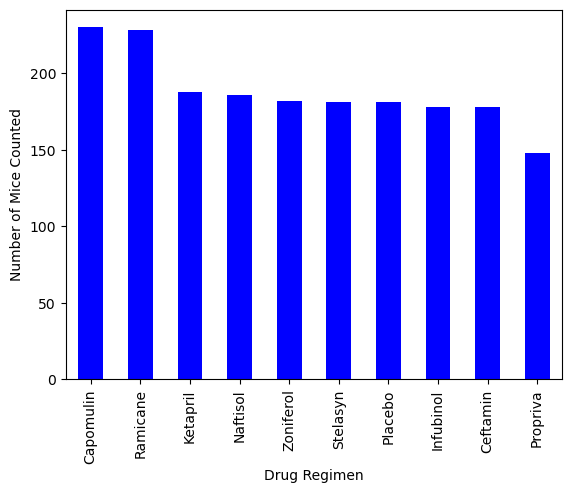

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create variable for drug regimen data
drug_regimens = clean_data["Drug Regimen"].value_counts()

# Create bar graph 
drug_regimens.plot(kind="bar", facecolor="blue")

# Label title and each axis
plt.ylabel("Number of Mice Counted")
plt.xlabel("Drug Regimen")

# Save image to files and print 
plt.savefig("Resources/Drug_Regimen_Graph_PANDAS.png")

plt.show()



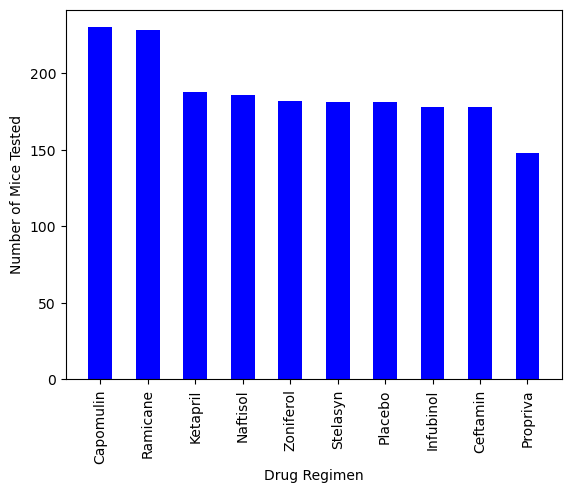

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create bar graph using plyplot using same variable as pandas graph 
plt.bar(drug_regimens.index.values, drug_regimens.values,color="b", width=0.50)

# Label each axis and rotate labels. 
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)#rotate labels to match pandas
plt.ylabel("Number of Mice Tested")

# Save image to files and print 
plt.savefig("Resources/Drug_Regimen_Graph_PYPLOT.png")

plt.show()

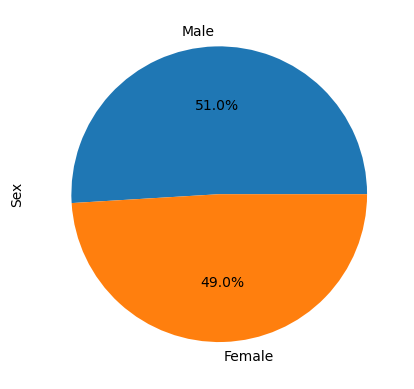

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create variables for gender
mice_gender = clean_data['Sex'].value_counts()

# Create pie chart
mice_gender.plot(kind="pie", autopct = "%1.1f%%")

# Save image to files and print 
plt.savefig("Resources/Gender_PieChart_PANDAS.png")
plt.show()

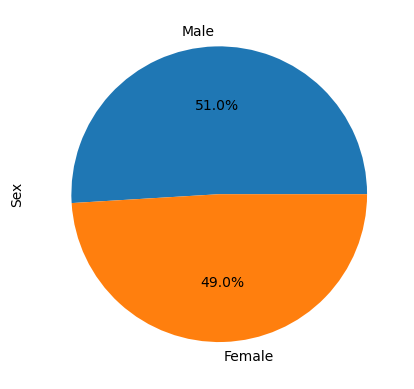

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create pie chart using same variables from PANDAS graph
plt.pie(mice_gender, labels=["Male", "Female"], autopct = "%1.1f%%")

# Create equal axis to form perfect circle and name y-axis 
plt.axis = "equal"
plt.ylabel("Sex")

# Save image to files and print 
plt.savefig("Resources/Gender_PieChart_PYPLOT.png")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Use LOC to create dataframes for each drug 
                      
CAP_loc = clean_data.loc[clean_data["Drug Regimen"] == 'Capomulin']
RAM_loc = clean_data.loc[clean_data["Drug Regimen"] == 'Ramicane']
INF_loc = clean_data.loc[clean_data["Drug Regimen"] == 'Infubinol']
CEF_loc = clean_data.loc[clean_data["Drug Regimen"] == 'Ceftamin']



# use MAX to find the max timepoint for each mouse 
CAP_max = CAP_loc.groupby(["Mouse ID"])["Timepoint"].max()
RAM_max = RAM_loc.groupby(["Mouse ID"])["Timepoint"].max()
INF_max = INF_loc.groupby(["Mouse ID"])["Timepoint"].max()
CEF_max = CEF_loc.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
CAP_merge = pd.merge(CAP_max, clean_data, how="inner",left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])
RAM_merge = pd.merge(RAM_max, clean_data, how="inner",left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])
INF_merge = pd.merge(INF_max, clean_data, how="inner",left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])
CEF_merge = pd.merge(CEF_max, clean_data, how="inner",left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])

# merged_data = pd.DataFrame [CAP_merge, RAM_merge, INF_merge, CEF_merge]
# merged_data

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = [CAP_merge, RAM_merge, INF_merge, CEF_merge]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
n=0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments_list:
    drug = x.loc[:, "Tumor Volume (mm3)"]
    tumor_vol_list.append(drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug.quantile([0.25, 0.50, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    
    lower_bounds = lower - (1.5*iqr)
    upper_bounds = upper + (1.5*iqr)

    print(drug_names[n])
    n+=1
    print(f"Potential outliers: {lower_bounds} and {upper_bounds}")

Capomulin
Potential outliers: 20.70456164999999 and 51.83201549
Ramicane
Potential outliers: 17.912664470000003 and 54.30681135
Infubinol
Potential outliers: 36.83290494999999 and 82.74144559000001
Ceftamin
Potential outliers: 25.355449580000002 and 87.66645829999999


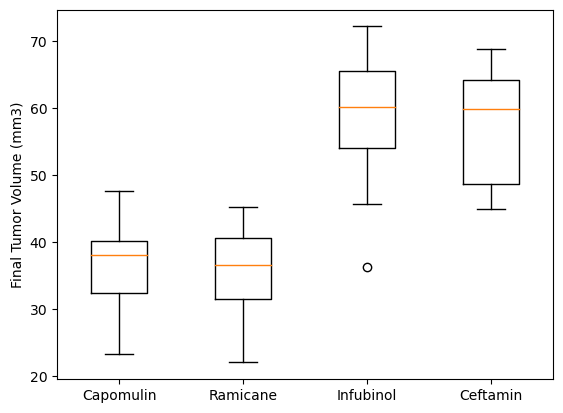

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create subplots 
figl, axl = plt.subplots()

# Label y-axis 
axl.set_ylabel("Final Tumor Volume (mm3)")

# Create boxplot 
axl.boxplot(tumor_vol_list, labels=drug_names)

# Save image to files and print 
plt.savefig("Resources/Tumor_Volume_Boxplot.png")
plt.show()



## Line and Scatter Plots

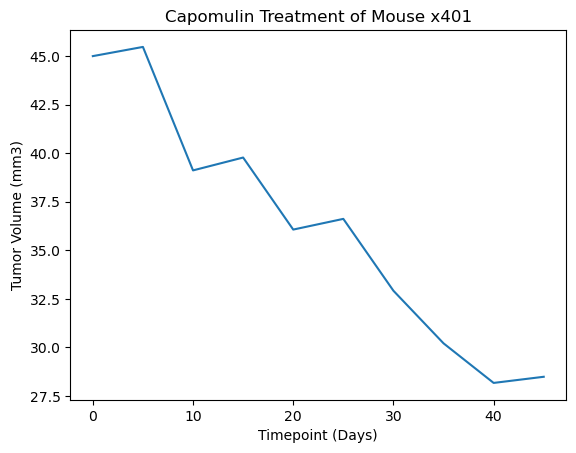

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Choose Mouse ID to study. Mouse ID: x401
mouse_x401 = clean_data.loc[clean_data["Mouse ID"] == "x401"]
#mouse_x401

# Create line plot and labels 
plt.plot(mouse_x401["Timepoint"], mouse_x401["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse x401")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


# Save image to files and print 
plt.savefig("Resources/Mousex401_Study.png")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

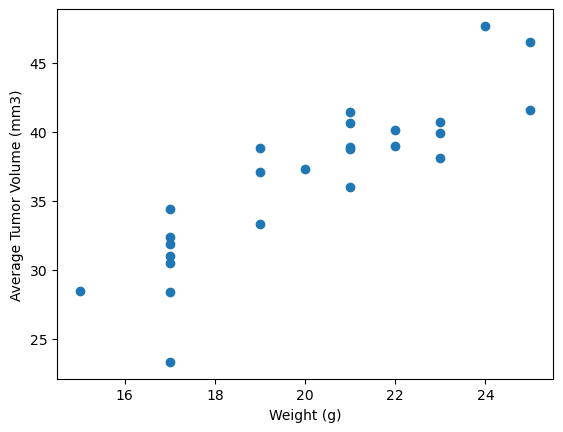

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create variable for average tumor volume and mouse weight
avg_tumor_vol = CAP_merge.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
CAP_weight = CAP_merge["Weight (g)"]

x_values = CAP_weight
y_values = avg_tumor_vol

# Create graph and labels
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

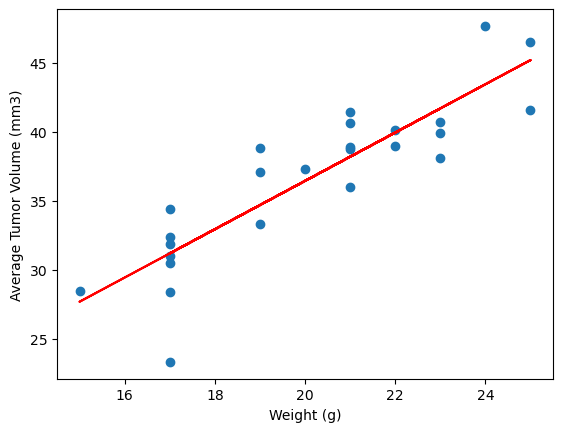

The correlation between mouse weight and the average tumor volume is 0.8767060403658117


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set variables for each axis
x_values = CAP_weight
y_values = avg_tumor_vol

# Create linregress
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept 


# Create graph 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Save image to files and print 
plt.savefig("Resources/Avg_Tumor_and_Weight.png")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")